In [1]:
# verify CUDA
! /usr/local/cuda/bin/nvcc --version

# symbolic link
! ln -s /content/drive/My\ Drive/asm_coop /asm
% cd /asm/darknet
! chmod +x darknet

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
/content/drive/My Drive/asm_coop/darknet


In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def imShow(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def download(path):
  from google.colab import files
  files.download(path)

In [3]:
counter = 1

# download from internet
counter = counter + 1
link = "https://media.nationalgeographic.org/assets/photos/218/954/a4b922dc-def3-4a5d-a6e0-ab5dce621fc2.jpg"
local_folder = "/asm/project_mvtec/test_images/"
test_img = local_folder + str(counter) + ".jpg"
! wget {link} -O {test_img} 
imShow(test_img)

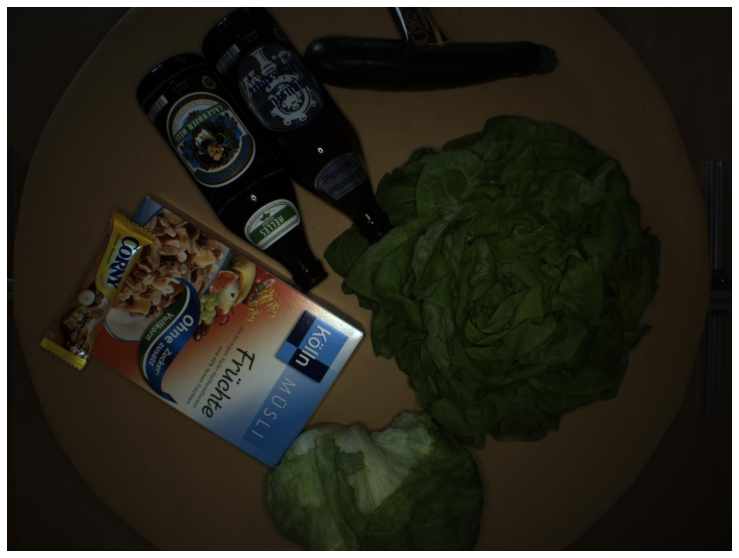

In [4]:
# test_img = "/asm/project_mvtec/test_images/3.jpg"
test_img = "/asm/project_mvtec/mvtec_yolo/test_1800/D2S_027920.jpg"
imShow(test_img)

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   3 route  1 		                           ->  160 x 160 x  64 
   4 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   5 conv     32       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  32 0.105 BF
   6 conv     64       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  64 0.944 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 160 x 160 x  64 0.002 BF
   8 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x

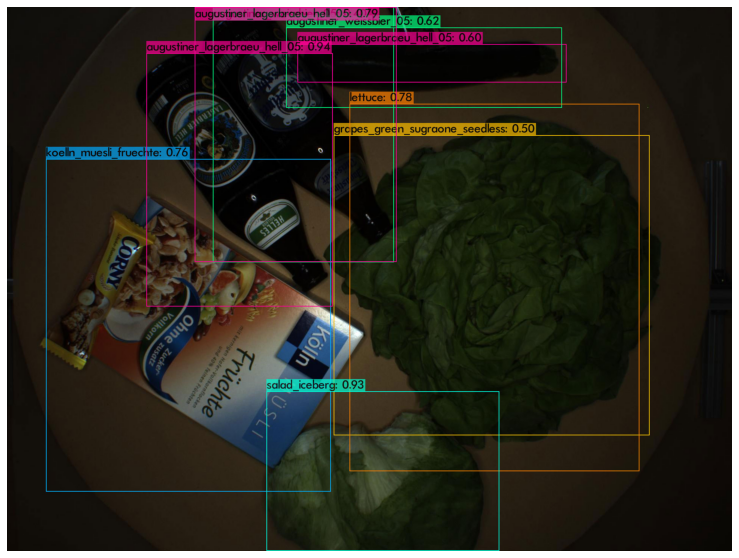

In [ ]:
!./darknet detector test data/obj.data cfg/mvtec-test.cfg /asm/project_mvtec/yolo_config/backup/mvtec_3000.weights {test_img}
imShow('predictions.jpg')